# MLFlow

In [ ]:
!pip install dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import mlflow
import dagshub

import mlflow.tensorflow
from mlflow.models.signature import infer_signature

# Set up MLflow tracking
dagshub.init(repo_owner='simoLoc', repo_name='ProgettoSE4AI', mlflow=True)

# Funzione che attiva il logging automatico di iperparametri, metriche ecc, a seconda della libreria usata.
# Eventualmente possiamo specificarne altre manualmente con mlflow.log_metric()
mlflow.autolog()

# Attiviamo l'autolog per TensorFlow
mlflow.tensorflow.autolog()

# Creiamo un esperimento in MLflow
mlflow.set_experiment("CNN Classification Report")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=4eca9333-aeac-4511-b623-b59b55b1cbd1&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=8363700452b1275ab086293ace50f00c413fef4a0df24841d508a84d3c4f0fe7




Output()

Accessing as simoLoc

Initialized MLflow to track repo "simoLoc/ProgettoSE4AI"

Repository simoLoc/ProgettoSE4AI initialized!

2025/06/03 12:45:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/06/03 12:45:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/06/03 12:45:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/06/03 12:45:19 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/03 12:45:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


<Experiment: artifact_location='mlflow-artifacts:/830f85127d2b48559d1927a1f9a1830a', creation_time=1748599390777, experiment_id='2', last_update_time=1748599390777, lifecycle_stage='active', name='CNN Classification Report', tags={}>

# Import Librerie


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import shutil
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import seaborn as sns
from PIL import Image
import copy
from tqdm.keras import TqdmCallback

2025/06/03 12:45:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


## Configurazione device

Un oggetto tensorflow.device rappresenta il dispositivo sul quale avverrà l'esecuzione.  Se il dispositivo disponibile è una GPU, allora la stringa in input sarà '/GPU:0', altrimenti nel nostro caso sarà la CPU passando in input '/CPU:0'.

In [ ]:
device = tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0')
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Apertura dataset già splittato in train e test

In [ ]:
data_dir = '/content/drive/Shareddrives/ProgettoSE4AI/datasetUTK/'

Creazione del `tf.data.Dataset`a partire dal dataframe in precedenza inizializzato, effettua il parsing e il preprocessing delle immagini. In particolare, le trasformazioni effettuate sono:
* `Rescaling`, il quale effettua uno scaling dei valori in un range da 0 a 1, poichè i modelli di deep learning funzionano meglio con valori normalizzati;
* `Normalize`, il quale di standardizzare i dati in un range da [-1, 1], sottraendo per la media e dividendo per la deviazione standard. Prende in input due tuple (che indicano media e deviazione standard) con tre elementi (Red, Green e Blue).



In [ ]:
train_paths = np.load(data_dir + 'train_paths.npy')
test_paths = np.load(data_dir + 'test_paths.npy')
test_labels_np = np.load(data_dir + 'test_labels.npy')
train_labels_np = np.load(data_dir + 'train_labels.npy')


# layers di preprocessing
rescale = tf.keras.layers.Rescaling(1.0 / 255.0)

normalization = tf.keras.layers.Normalization(
    mean=[0.485, 0.456, 0.406],
    variance=[0.229, 0.224, 0.225]
)


# funzione di parsing e preprocessing
@tf.function
def parse_image(path):
    # leggi
    img = tf.io.read_file('/content/drive/Shareddrives/ProgettoSE4AI/' + path)
    # decodifica come immagine RGB
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    # le immagini originali sono 200x200
    img = tf.image.resize(img, [200, 200])
    # applica rescaling e normalization
    img = rescale(img)
    img = normalization(img)
    return img


# Prepara il dataset completo immagini + label
def create_dataset(image_paths, labels_array):
    AUTOTUNE = tf.data.AUTOTUNE

    images = tf.data.Dataset.from_tensor_slices(image_paths)
    labels = tf.data.Dataset.from_tensor_slices(labels_array)

    dataset = (
        tf.data.Dataset.zip((images, labels))
        .map(lambda path, label: (
            parse_image(path),
            {
                'age': label[0],
                'gender': label[1],
                'ethnicity': label[2]
            }
        ), num_parallel_calls=AUTOTUNE)
        .prefetch(AUTOTUNE)
    )
    return dataset

# Dataset unificati
train_dataset = create_dataset(train_paths, train_labels_np)
test_dataset = create_dataset(test_paths, test_labels_np)

# Verifica
for image, label in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)

Image shape: (200, 200, 3)
Label: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'gender': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'ethnicity': <tf.Tensor: shape=(), dtype=int64, numpy=3>}


# Definizione CNN

In [ ]:
def create_CNN_multi_output(input_shape,
                          num_ethnicity_classes=5,
                          num_age_classes=4,
                          dropout_rate=0.3,
                          activation='gelu',
                          learning_rate=1e-3):
    inputs = tf.keras.layers.Input(shape=input_shape)

    resnet_model = tf.keras.applications.EfficientNetB0(
      include_top=False,
      weights=None,
      input_tensor=inputs,
      input_shape=input_shape,
      pooling=None,
      classifier_activation='softmax'
    )

    x = resnet_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(32, activation=activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    # Output heads
    age_output = tf.keras.layers.Dense(num_age_classes, activation='softmax', name='age')(x)
    gender_output = tf.keras.layers.Dense(1, activation='sigmoid', name='gender')(x)
    ethnicity_output = tf.keras.layers.Dense(num_ethnicity_classes, activation='softmax', name='ethnicity')(x)

    model = tf.keras.Model(inputs, [age_output, gender_output, ethnicity_output])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss={
            'age': 'sparse_categorical_crossentropy',
            'gender': 'binary_crossentropy',
            'ethnicity': 'sparse_categorical_crossentropy',
        },
        metrics={
            'age': 'accuracy',
            'gender': 'accuracy',
            'ethnicity': 'accuracy'
        }
    )
    return model

# Evaluation

In [ ]:
dic = {
  "age": {
    "0": "Young",
    "1": "Adult",
    "2": "Senior",
    "3": "Elderly"
  },
  "ethnicity": {
    "0": "White",
    "1": "Black",
    "2": "Asian",
    "3": "Indian",
    "4": "Others"
  },
  "gender": {
    "0": "Male",
    "1": "Female"
  }
}


In [ ]:
best_model_path = '/content/drive/Shareddrives/ProgettoSE4AI/train_model/Best_Model_b32_eps15_lr_0.001_dr0.5.keras'
model = create_CNN_multi_output(input_shape=(200, 200, 3), dropout_rate=0.5, learning_rate=1e-3)
model.load_weights(best_model_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 440 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
def get_info_evaluation(y_test, y_pred, classes, attribute_name):
    # Matrice di confusione basata su indici interi
    cm = confusion_matrix(y_test, y_pred)

    # Classification report con nomi delle classi
    cr = classification_report(y_test, y_pred, target_names=classes)

    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    print("Classification Report\n", cr)
    print(f"F1: {f1}%")
    print(f"Recall: {recall}%")
    print(f"Precision: {precision}%")
    print(f"Accuracy: {accuracy}%")

    mlflow.log_metric(f"{attribute_name}_accuracy", accuracy)
    mlflow.log_metric(f"{attribute_name}_precision", precision)
    mlflow.log_metric(f"{attribute_name}_recall", recall)
    mlflow.log_metric(f"{attribute_name}_f1", f1)

    # Salviamo il classification report come artifact
    report_path = f"{attribute_name}_classification_report.txt"
    with open(report_path, "w") as f:
      f.write(cr)
    mlflow.log_artifact(report_path)
    os.remove(report_path)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(xticks_rotation='vertical', ax=ax, cmap=plt.cm.Blues)

    # Salviamo la matrice di confusione come immagine
    fig_path = f"{attribute_name}_confusion_matrix.png"
    plt.savefig(fig_path)

    mlflow.log_artifact(fig_path)
    plt.show()
    plt.close()
    os.remove(fig_path)

    return accuracy, precision, recall, f1

In [ ]:
y_test_age = test_labels_np[:, 0]   # array di shape (N,)
y_test_gender = test_labels_np[:, 1]   # array di shape (N,)
y_test_ethnicity= test_labels_np[:, 2]   # array di shape (N,)

batch_size = 32
test_dataset_batched = test_dataset.batch(batch_size)

raw_preds = model.predict(test_dataset_batched)
# raw_preds sarà un dict del tipo:
# [
#   array di shape (N, num_class_age),      # age
#   array di shape (N, 1),                  # gender
#   array di shape (N, num_class_ethnicity) # ethnicity
# ]

127/127 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step


In [ ]:
y_pred_age = np.argmax(raw_preds[0], axis=1)

y_pred_gender = np.round(raw_preds[1]).astype(int).flatten()

y_pred_ethnicity = np.argmax(raw_preds[2], axis=1)

classes_age = [dic["age"][str(i)] for i in range(len(dic["age"]))]
classes_gender = [dic["gender"][str(i)] for i in range(len(dic["gender"]))]
classes_ethnicity = [dic["ethnicity"][str(i)] for i in range(len(dic["ethnicity"]))]

=== VALUTAZIONE per AGE ===
Classification Report
               precision    recall  f1-score   support

       Young       0.89      0.82      0.85       970
       Adult       0.83      0.92      0.88      2182
      Senior       0.76      0.65      0.70       787
     Elderly       0.71      0.28      0.41       102

    accuracy                           0.83      4041
   macro avg       0.80      0.67      0.71      4041
weighted avg       0.83      0.83      0.82      4041

F1: 70.96%
Recall: 67.11%
Precision: 79.72%
Accuracy: 83.1%


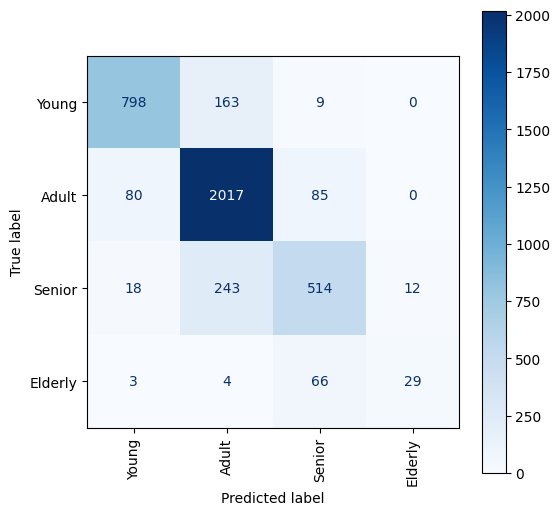


=== VALUTAZIONE per GENDER ===
Classification Report
               precision    recall  f1-score   support

        Male       0.85      0.90      0.88      2042
      Female       0.90      0.83      0.86      1999

    accuracy                           0.87      4041
   macro avg       0.87      0.87      0.87      4041
weighted avg       0.87      0.87      0.87      4041

F1: 86.93%
Recall: 86.92%
Precision: 87.15%
Accuracy: 86.96%


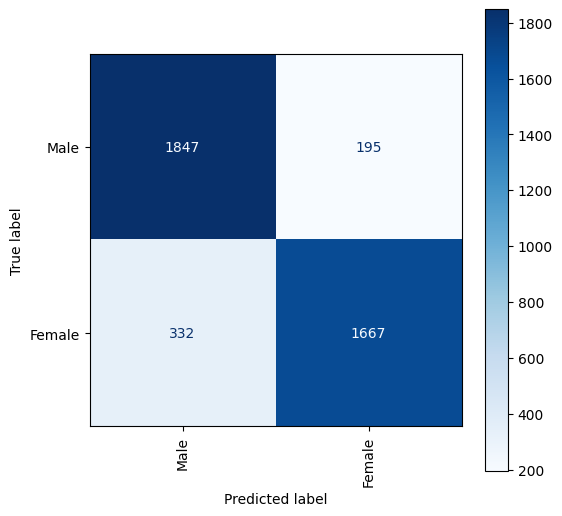


=== VALUTAZIONE per ETHNICITY ===
Classification Report
               precision    recall  f1-score   support

       White       0.74      0.89      0.81      1290
       Black       0.80      0.90      0.85       904
       Asian       0.85      0.85      0.85       701
      Indian       0.78      0.73      0.76       788
      Others       0.43      0.04      0.07       358

    accuracy                           0.78      4041
   macro avg       0.72      0.68      0.67      4041
weighted avg       0.75      0.78      0.75      4041

F1: 66.6%
Recall: 68.24%
Precision: 72.1%
Accuracy: 77.98%


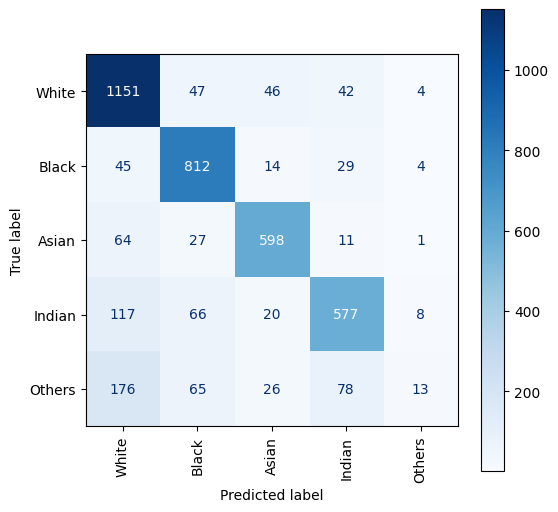

🏃 View run silent-hound-936 at: https://dagshub.com/simoLoc/ProgettoSE4AI.mlflow/#/experiments/2/runs/d3e6dbcda9cc492f8894c98fe5a20154
🧪 View experiment at: https://dagshub.com/simoLoc/ProgettoSE4AI.mlflow/#/experiments/2


In [ ]:

with mlflow.start_run():
  print("=== VALUTAZIONE per AGE ===")
  acc_age, prec_age, rec_age, f1_age = get_info_evaluation(
      y_test_age, y_pred_age, classes_age, "age"
  )

  print("\n=== VALUTAZIONE per GENDER ===")
  acc_gender, prec_gender, rec_gender, f1_gender = get_info_evaluation(
      y_test_gender, y_pred_gender, classes_gender, "gender"
  )

  print("\n=== VALUTAZIONE per ETHNICITY ===")
  acc_eth, prec_eth, rec_eth, f1_eth = get_info_evaluation(
      y_test_ethnicity, y_pred_ethnicity, classes_ethnicity, "ethnicity"
  )


# Evaluation Fairness

In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference, demographic_parity_difference, demographic_parity_ratio
import numpy as np

def fairness_metrics_fairlearn(data, target_col, pred_col, sensitive_cols):
    results = {}

    # Calcolo delle frequenze (supporti) per ciascuna classe
    label_counts = data[target_col].value_counts().sort_index().to_dict()
    # sommatoria totale
    total_count = sum(label_counts.values())

    labels = sorted(data[target_col].unique())

    for sensitive in sensitive_cols:
        eod_list = []
        parity_list = []

        sensitive_features = data[sensitive]
        for label in labels:

            # Binarizza target e predizione (One-vs-All)
            y_true_bin = data[target_col].apply(lambda x: 1 if x == label else 0)
            y_pred_bin = data[pred_col].apply(lambda x: 1 if x == label else 0)

            try:
                eod = equalized_odds_difference(
                    y_true=y_true_bin,
                    y_pred=y_pred_bin,
                    sensitive_features=sensitive_features
                )

                parity_diff = demographic_parity_difference(
                    y_true=y_true_bin,
                    y_pred=y_pred_bin,
                    sensitive_features=sensitive_features
                )

                # Peso = numero di esempi con true==label
                support = label_counts[label]

                # Salviamo per calcolo pesato
                eod_list.append((label, eod, support))
                parity_list.append((label, parity_diff, support))

                prefix = f"target_{target_col}_{label}_sensitive_{sensitive}"

                mlflow.log_metric(f"{prefix}_equalized_odds_difference", eod)
                mlflow.log_metric(f"{prefix}_statistical_parity_diff", parity_diff)


                if sensitive not in results:
                    results[sensitive] = []

                results[sensitive].append({
                    'target_label': label,
                    'support': support,
                    'equalized_odds_difference': eod,
                    'statistical_parity_difference': parity_diff
                })

                print(f"[{target_col} = {label}] - Sensitive: {sensitive}")
                print(f"EOD: {eod:.4f}, \n SPD: {parity_diff:.4f}")

            except ValueError as e:
                print(f"Errore con target={target_col}, label={label}, sensitive={sensitive}: {e}")

        weighted_eod = sum(support * eod for (_, eod, support) in eod_list) / total_count
        weighted_spd = sum(support * parity for (_, parity, support) in parity_list) / total_count

        print(f"Mean EOD for {sensitive}: {weighted_eod:.4f}")
        print(f"Mean SPD for {sensitive}: {weighted_spd:.4f}")

        mlflow.log_metric(f"mean_{target_col}_sensitive_{sensitive}_eod", weighted_eod)
        mlflow.log_metric(f"mean_{target_col}_sensitive_{sensitive}_spd", weighted_spd)

    return results


In [ ]:
# Crea DataFrame con target reali e predetti per ogni attributo
df = pd.DataFrame({
    'age': y_test_age,
    'gender': y_test_gender,
    'ethnicity': y_test_ethnicity,
    'pred_age': y_pred_age,
    'pred_gender': y_pred_gender,
    'pred_ethnicity': y_pred_ethnicity
})

with mlflow.start_run():
  print("=== FAIRNESS EVALUATION per AGE ===")
  results_age = fairness_metrics_fairlearn(
      data=df,
      target_col='age',
      pred_col='pred_age',
      sensitive_cols=['gender', 'ethnicity']
  )

  print("\n=== FAIRNESS EVALUATION per GENDER ===")
  results_gender = fairness_metrics_fairlearn(
      data=df,
      target_col='gender',
      pred_col='pred_gender',
      sensitive_cols=['age', 'ethnicity']
  )

  print("\n=== FAIRNESS EVALUATION per ETHNICITY ===")
  results_ethnicity = fairness_metrics_fairlearn(
      data=df,
      target_col='ethnicity',
      pred_col='pred_ethnicity',
      sensitive_cols=['age', 'gender']
  )

# # Visualizza risultati
# import pprint
# pprint.pprint(results_gender)


=== FAIRNESS EVALUATION per AGE ===
[age = 0] - Sensitive: gender
EOD: 0.0273, 
 SPD: 0.0617
[age = 1] - Sensitive: gender
EOD: 0.0218, 
 SPD: 0.0202
[age = 2] - Sensitive: gender
EOD: 0.0578, 
 SPD: 0.0895
[age = 3] - Sensitive: gender
EOD: 0.0955, 
 SPD: 0.0076
Mean EOD for gender: 0.0320
Mean SPD for gender: 0.0433
[age = 0] - Sensitive: ethnicity
EOD: 0.4402, 
 SPD: 0.2927
[age = 1] - Sensitive: ethnicity
EOD: 0.4020, 
 SPD: 0.5788
[age = 2] - Sensitive: ethnicity
EOD: 0.4555, 
 SPD: 0.3375
[age = 3] - Sensitive: ethnicity
EOD: 0.3200, 
 SPD: 0.0240
Mean EOD for ethnicity: 0.4195
Mean SPD for ethnicity: 0.4491

=== FAIRNESS EVALUATION per GENDER ===
[gender = 0] - Sensitive: age
EOD: 0.4088, 
 SPD: 0.2905
[gender = 1] - Sensitive: age
EOD: 0.4088, 
 SPD: 0.2905
Mean EOD for age: 0.4088
Mean SPD for age: 0.2905
[gender = 0] - Sensitive: ethnicity
EOD: 0.1864, 
 SPD: 0.1857
[gender = 1] - Sensitive: ethnicity
EOD: 0.1864, 
 SPD: 0.1857
Mean EOD for ethnicity: 0.1864
Mean SPD for ethn

# Shap

Explenability

In [ ]:
!pip install shap
import shap
import numpy as np

X = aX.astype(float)

# max_evals deve assumere un valore che sia almeno pari a 2 * num_features + 1
# (nel nostro caso 2 * 514 + 1 = 1029)
num_features = X.shape[1]
required_max_evals = 2 * num_features + 1

background = shap.maskers.Independent(X, max_samples=1000)
explainer_fair = shap.Explainer(clf.predict, X, seed=42, max_evals=required_max_evals)

shap_values_fair = explainer_fair(X)

In [ ]:
mean_abs_shap = shap_values_fair.abs.mean(0)
top_10_features = np.argsort(mean_abs_shap.values)[-10:]

shap.plots.beeswarm(shap_values_fair[:, top_10_features])

# Definizione del metodo `classify_face(image_path)`



In [ ]:
import json

def preprocess_image(image_path):
  # leggi
  image = tf.io.read_file(image_path)
  # decodifica come immagine RGB
  image = tf.image.decode_image(image, channels=3, expand_animations=False)
  image = tf.image.resize(image, (200, 200))
  image = tf.cast(image, tf.float32) / 255.0
  image = tf.expand_dims(image, axis=0)  # batch dimension
  return image

def classify_face(image_path):
  """
  Classifica l'immagine del volto in età, genere, ed etnia.

  Args:
      image_path: path dell'immagine.

  Returns:
      dict: classificazioni in formato JSON.
  """
  processed_image = preprocess_image(image_path)
  preds = model.predict(processed_image)

  # Estrai le predizioni
  age_class_idx = str(np.argmax(preds[0]))
  gender_class_idx = str(round(preds[1][0][0]))  # output sigmoide
  ethnicity_class_idx = str(np.argmax(preds[2]))

  # Mapping con il dizionario
  result = {
      "age": dic["age"][age_class_idx],
      "gender": dic["gender"][gender_class_idx],
      "ethnicity": dic["ethnicity"][ethnicity_class_idx],
      "raw_output": {
          "age_logits": preds[0],
          "gender_prob": float(preds[1][0][0]),
          "ethnicity_logits": preds[2]
      }
  }

  return json.dumps(result, indent=2)


print(classify_face(test_paths[1]))